In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the dataset path (relative to the project directory)
dataset_dir = 'Dataset'
yes_dir = os.path.join(dataset_dir, 'yes')
no_dir = os.path.join(dataset_dir, 'no')

# Create directories for train and validation sets inside the 'Dataset' folder
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')

train_yes_dir = os.path.join(train_dir, 'yes')
train_no_dir = os.path.join(train_dir, 'no')
validation_yes_dir = os.path.join(validation_dir, 'yes')
validation_no_dir = os.path.join(validation_dir, 'no')

# Create the directories if they don't exist
os.makedirs(train_yes_dir, exist_ok=True)
os.makedirs(train_no_dir, exist_ok=True)
os.makedirs(validation_yes_dir, exist_ok=True)
os.makedirs(validation_no_dir, exist_ok=True)

# Function to split the data
def split_data(source_dir, train_dir, validation_dir, split_size=0.8):
    files = os.listdir(source_dir)
    files = [f for f in files if os.path.isfile(os.path.join(source_dir, f))]
    train_files, val_files = train_test_split(files, test_size=(1 - split_size))
    
    # Copy files to the respective directories
    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, file))
        
    for file in val_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(validation_dir, file))

# Split the 'yes' and 'no' data into train and validation sets
split_data(yes_dir, train_yes_dir, validation_yes_dir, split_size=0.8)
split_data(no_dir, train_no_dir, validation_no_dir, split_size=0.8)

print("Data split complete.")


Data split complete.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_width, img_height = 150, 150

# Data Augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Only rescale validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training data from train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

# Load validation data from validation_dir
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

print("Data generators created.")


Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
Data generators created.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("Model built and compiled.")


Model built and compiled.


D:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Adjust this based on your dataset size
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)  # Adjust this based on your dataset size

print("Model training complete.")


Epoch 1/30


D:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  7/100 ━━━━━━━━━━━━━━━━━━━━ 27s 300ms/step - accuracy: 0.5780 - loss: 0.6643

D:\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.6114 - loss: 0.6610 - val_accuracy: 0.6078 - val_loss: 0.6618
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5861 - loss: 0.6752 - val_accuracy: 0.6078 - val_loss: 0.6520
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6323 - loss: 0.6327 - val_accuracy: 0.6667 - val_loss: 0.6388
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6696 - loss: 0.6369 - val_accuracy: 0.6275 - val_loss: 0.6326
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6839 - loss: 0.6114 - val_accuracy: 0.7059 - val_loss: 0.5750
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6990 - loss: 0.5864 - val_accuracy: 0.6667 - val_loss: 0.5806
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6583 - loss: 0.6114 - val_accuracy: 0.6471 - val_loss: 0.6423
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6334 - loss: 0.6277 - val_accuracy: 0.647

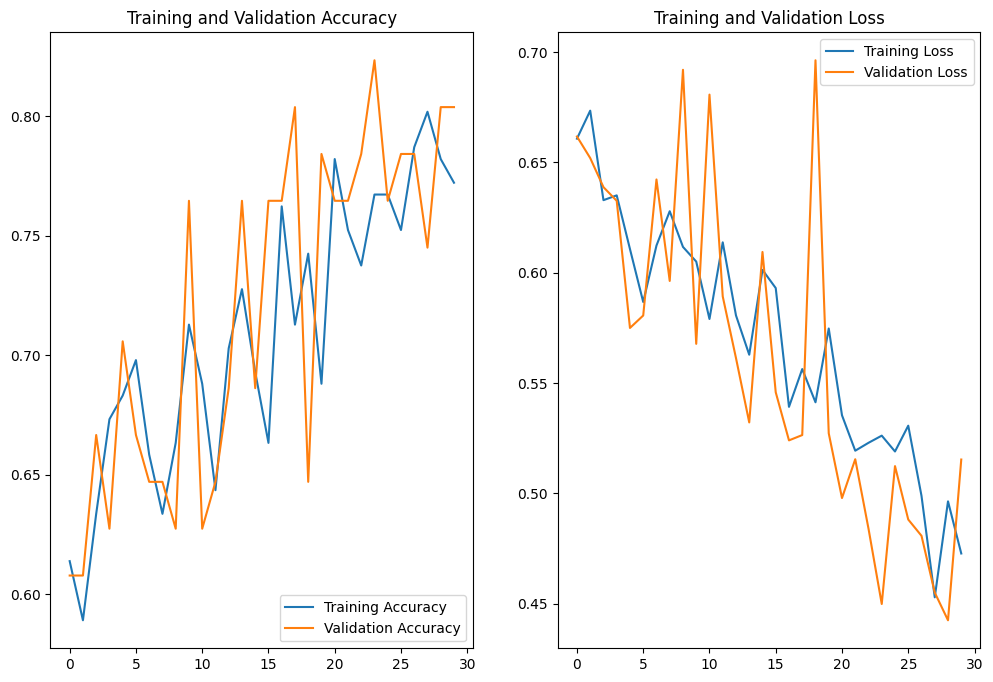

Model saved and training plot displayed.


In [5]:
# Save the model
model.save('brain_tumor_detection_cnn.h5')

# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print("Model saved and training plot displayed.")
